In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/end-of-year-values.csv', header=1).dropna(axis=0, how='all').dropna(axis=1, how='all')
df = df.loc[(df.Year > 1998.)].rename({'bytes/flop': 'bytes_flop_ratio'}, axis=1)
df

,Year,Terabytes,TB annual change,Teraflops,bytes_flop_ratio
36,1999.0,374.0,160.0,0.14,2643.40
37,2000.0,534.0,228.0,0.95,563.73
38,2001.0,762.0,302.0,2.86,266.13
39,2002.0,1064.0,554.0,2.10,505.82
40,2003.0,1618.0,576.0,10.69,151.34
41,2004.0,2194.0,446.0,10.69,205.22
42,2005.0,2640.0,783.0,21.70,121.65
43,2006.0,3423.0,1445.0,33.09,103.46
44,2007.0,4868.0,1733.0,33.09,147.14
45,2008.0,6601.0,2028.0,95.71,68.97


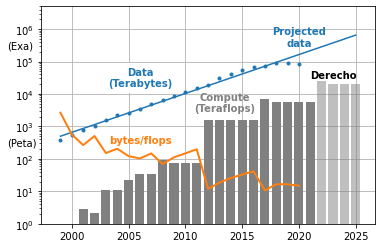

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_axisbelow(True)
ax.grid()

# data
x, y = df.Year.values, df.Terabytes.values
k = np.isnan(x) | np.isnan(y)
x, y = x[~k], y[~k]
p = ax.plot(x, y, '.')
beta = np.polyfit(x, np.log(y), 1)

ax.text(2006, 1.7e4, 'Data\n(Terabytes)', 
        fontweight='bold',
        ha='center',
        backgroundcolor='w',
        c=p[0].get_color())

ax.text(2020, 3e5, 'Projected\ndata', 
        fontweight='bold',
        ha='center',
        c=p[0].get_color())

xhat = np.array([x[0], 2025.])
yhat = np.exp(beta[0] * xhat + beta[1])
ax.plot(xhat, yhat, '-', c=p[0].get_color())


# compute
ndx = df.Year <= 2021
ax.bar(df.loc[ndx].Year, df.loc[ndx].Teraflops, color='gray')

ndx = df.Year >= 2021
ax.bar(df.loc[ndx].Year, df.loc[ndx].Teraflops, color='gray', alpha=0.5)

ax.text(2013.5, 2.9e3, 'Compute\n(Teraflops)', 
        fontweight='bold',
        ha='center',
        c='gray',
       )

ax.text(2023., 3e4, 'Derecho',
        fontweight='bold',
        ha='center',
        c='k',
       )

p = ax.plot(df.Year, df.bytes_flop_ratio, '-', lw=2.)

ax.text(2006, 3e2, 'bytes/flops',
        fontweight='bold',
        ha='center',
        c=p[0].get_color())

ax.set_yscale('log')

ax.set_ylim((1e0, 0.5e7))

xlm = ax.get_xlim()
ax.text(xlm[0]-np.diff(xlm)*0.1, 1e3/4, '(Peta)')
ax.text(xlm[0]-np.diff(xlm)*0.1, 1e6/4, '(Exa)');